Nesse material a gente vai relembrar os conteúdos envolvendo **gráficos de composição e relacionamento**.

<img src="https://www.alura.com.br/artigos/assets/tipo-de-visualizacao-de-dados/diagrama-visualizacao-dados.jpg" alt="inserir alt" height="600">

<font size=2>Fonte: [Dicas de como escolher o tipo de visualização de dados para sua análise](https://www.alura.com.br/artigos/tipo-de-visualizacao-de-dados?srsltid=AfmBOop3lo0vltYH_Amjl7KKg3Xg_8OD46YKZmX8Y73EXEXqkj3YrucW)</font>

## Composição

Vamos iniciar com os gráficos de **composição**!

Utilizamos gráficos de composição em visualizações quando queremos mostrar como diferentes partes contribuem para a formação de um todo. As visualizações indicadas para essa representação são aquelas que destacam partes de um todo.

Podemos categorizar as opções de visualização com base em duas características do tipo de informação que tentamos transmitir:

- Quando desejamos representar os dados em um único ponto no tempo ou em uma situação fixa, dizemos que é uma representação **estática**. O objetivo é mostrar uma composição em um instante específico.
- Quando desejamos mostrar como a composição muda ao longo de um período ou em diferentes momentos, chamamos de uma representação **dinâmica**. Nesse caso, são analisadas mudanças estruturais ou tendências nos dados.

Para nossos exemplos utilizaremos as seguintes bibliotecas:

* [`matplotlib`](https://matplotlib.org/stable/index.html)
* [`plotly`](https://plotly.com/python/)
* [`numpy`](https://numpy.org/doc/)

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

> ***Nota:*** *Todos os dados utilizados nos exemplos desse notebook são fictícios.*

### Gráfico de pizza

Quando queremos mostrar de forma simples poucas partes de um total, podemos utilizar uma representação como o **gráfico de pizza**. Embora seja necessário cuidado na construção da visualização, ele é válido para o caso que será apresentado.

Digamos que desejamos mostrar a proporção das respostas `Sim` e `Não` em relação a uma pergunta feita aos nossos clientes.

In [ ]:
# Dados
respostas = ['Sim', 'Não']  # Categorias de respostas
porcentagens = [77, 23]  # Proporção de cada categoria
cores = ['#76c7c0', '#ff6f61']  # Tons suaves de verde e vermelho

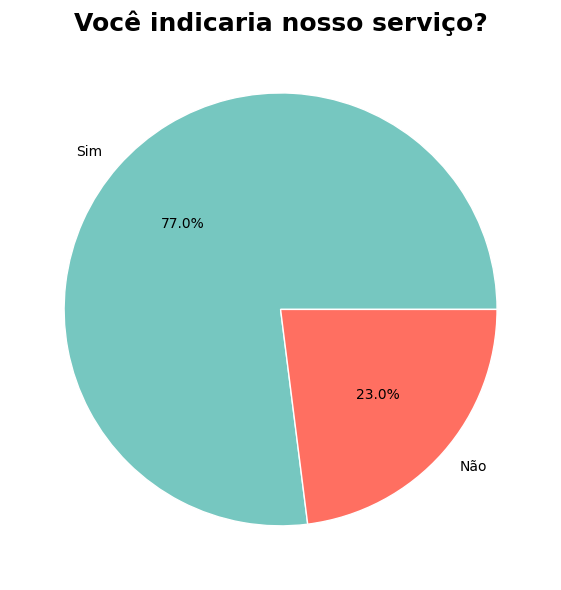

In [ ]:
# Criando o gráfico de pizza
plt.figure(figsize=(6, 6))  # Define o tamanho da figura (6x6 polegadas)
plt.pie(
    porcentagens,
    labels=respostas,  # Adiciona os rótulos nas fatias
    colors=cores,  # Define as cores de cada fatia
    autopct='%1.1f%%',  # Exibe os percentuais nas fatias (1 casa decimal)
    wedgeprops={'edgecolor': 'white'},  # Adiciona bordas brancas às fatias
)

# Adicionando o título
plt.title('Você indicaria nosso serviço?', fontsize=18, fontweight='bold')

# Exibe o gráfico
plt.tight_layout() # Ajusta automaticamente os elementos do gráfico para evitar sobreposição (como textos ou rótulos)
plt.show()

- [`plt.pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

### Gráfico de cascata

Quando nosso objetivo é destacar como se chegou a um resultado final, mostrando as alterações incrementais (positivas ou negativas) desde um valor inicial até o valor final, utilizamos o **gráfico de cascata**.

No exemplo a seguir, vamos mostrar como passamos da **Receita Bruta** para o **Lucro Líquido**, detalhando as contribuições de cada componente.

In [ ]:
# Dados
indicadores = ['Receita Bruta', 'Impostos', 'Despesas Operacionais', 'Lucro Líquido']  # Categorias
valores = [500000, -100000, -150000, 250000]  # Valores em reais
medidas = ['absolute', 'relative', 'relative', 'total']  # Configuração para cascata

In [ ]:
# Configurando o gráfico de cascata
fig = go.Figure(
    go.Waterfall(
        measure=medidas,  # Define o tipo de valor: 'absolute' (início), 'relative' (intermediários), 'total' (final)
        x=indicadores,  # Categorias no eixo X
        y=valores,  # Valores associados a cada categoria
        text=[f'R$ {v:,.2f}' for v in valores],  # Formata os rótulos como valores monetários
    )
)

# Adicionando título e legenda
fig.update_layout(
    title="Finanças da Empresa",  # Título do gráfico
    font=dict(size=14),  # Configura o tamanho da fonte
    plot_bgcolor="white",  # Define o fundo como branco
    yaxis_title="Valores (R$)",  # Título do eixo Y
)

# Exibindo o gráfico
fig.show()

- [`go.Waterfall`](https://plotly.com/python/waterfall-charts/)

---

Esses exemplos ilustram visualizações que utilizamos para mostrar uma **representação estática**, ou seja, em um único ponto no tempo ou em uma situação fixa. Para uma representação **dinâmica**, podemos explorar outras formas de visualização, que veremos a seguir.

---

### Gráfico de barras empilhadas

Quando precisamos mostrar como diferentes categorias compõem um todo em **poucos períodos**, podemos utilizar o **gráfico de barras empilhadas**.

No exemplo abaixo, apresentamos a composição dos tipos de acesso a um site ao longo de 3 trimestres.

In [ ]:
# Dados
trimestres = ['1º Trimestre', '2º Trimestre', '3º Trimestre']  # Períodos
redes_sociais = [1200, 1500, 1700]  # Acessos via redes sociais
pesquisa_google = [900, 1100, 1400]  # Acessos via pesquisa no Google
acesso_direto = [800, 700, 600]  # Acessos diretos

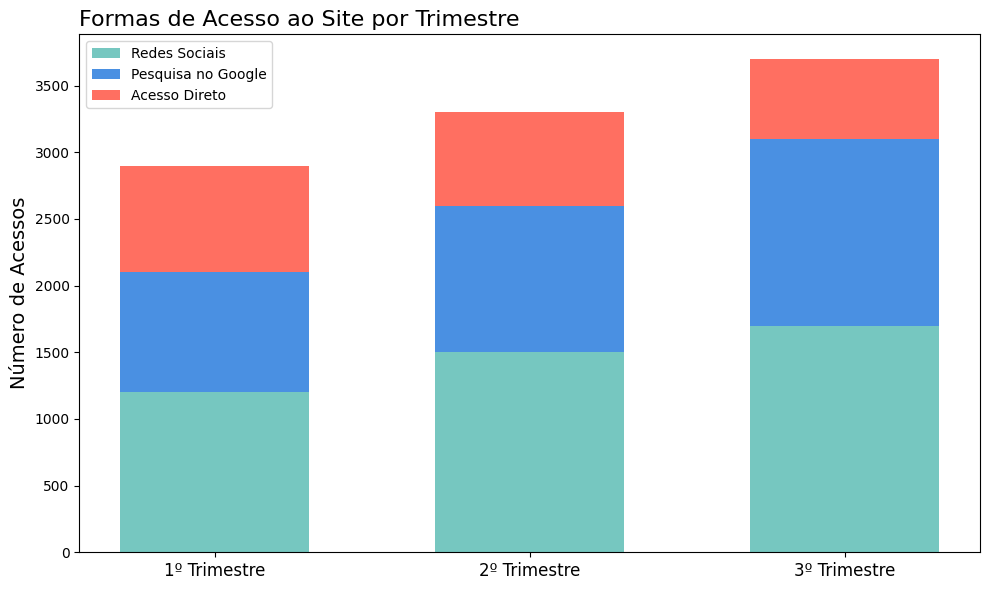

In [ ]:
# Configuração das barras
largura_barra = 0.6  # Largura das barras
x = np.arange(len(trimestres))  # Posições no eixo X

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
plt.bar(x, redes_sociais, label='Redes Sociais', color='#76c7c0', width=largura_barra)
plt.bar(x, pesquisa_google, label='Pesquisa no Google', color='#4a90e2', width=largura_barra,
        bottom=redes_sociais)
plt.bar(x, acesso_direto, label='Acesso Direto', color='#ff6f61', width=largura_barra,
        bottom=np.array(redes_sociais) + np.array(pesquisa_google))

# Adicionando informações no gráfico
plt.xticks(x, trimestres, fontsize=12)  # Define os rótulos no eixo X
plt.ylabel('Número de Acessos', fontsize=14)  # Define o rótulo do eixo Y
plt.title('Formas de Acesso ao Site por Trimestre', fontsize=16, loc='left')  # Adiciona o título
plt.legend()  # Adiciona a legenda

# Ajuste final e exibição
plt.tight_layout()
plt.show()

- [`plt.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

### Expandindo o material: Gráfico de áreas empilhadas

Quando precisamos mostrar como diferentes categorias compõem um todo em **muitos períodos**, podemos utilizar o **gráfico de áreas empilhadas**.

No exemplo abaixo, apresentamos a proporção de queimadas por biomas ao longo de vários anos. A apresentação adotada é através das porcentagens relativas de queimadas para cada bioma.

In [ ]:
# Dados
anos = ['2000', '2005', '2010', '2015', '2020']  # Períodos
floresta = [2000, 2500, 1800, 2200, 2100]  # Queimadas na floresta (em números absolutos)
savana = [1500, 2000, 2300, 2400, 2800]  # Queimadas na savana (em números absolutos)
deserto = [800, 900, 1000, 1100, 1200]  # Queimadas no deserto (em números absolutos)

# Calculando os valores relativos (em %)
totais = np.array(floresta) + np.array(savana) + np.array(deserto)  # Soma total de queimadas por ano
floresta_percent = (np.array(floresta) / totais) * 100  # Porcentagem de queimadas na floresta
savana_percent = (np.array(savana) / totais) * 100  # Porcentagem de queimadas na savana
deserto_percent = (np.array(deserto) / totais) * 100  # Porcentagem de queimadas no deserto

In [ ]:
# Criando o gráfico de áreas empilhadas
fig = go.Figure()

# Adicionando os dados da floresta ao gráfico
fig.add_trace(go.Scatter(
    x=anos,  # Eixo X (anos)
    y=floresta_percent,  # Eixo Y (porcentagem de queimadas na floresta)
    mode='lines',  # Modo de exibição: linhas conectando os pontos
    stackgroup='one',  # Empilhamento das áreas
    name='Floresta',  # Nome da legenda
    line=dict(width=0.5, color='#76c7c0')  # Estilo da linha (verde claro)
))

# Adicionando os dados da savana ao gráfico
fig.add_trace(go.Scatter(
    x=anos,
    y=savana_percent,  # Eixo Y (porcentagem de queimadas na savana)
    mode='lines',
    stackgroup='one',
    name='Savana',
    line=dict(width=0.5, color='#ffd700')  # Estilo da linha (amarelo)
))

# Adicionando os dados do deserto ao gráfico
fig.add_trace(go.Scatter(
    x=anos,
    y=deserto_percent,  # Eixo Y (porcentagem de queimadas no deserto)
    mode='lines',
    stackgroup='one',
    name='Deserto',
    line=dict(width=0.5, color='#ff6f61')  # Estilo da linha (vermelho)
))

# Configurando o layout
fig.update_layout(
    title='Proporção Relativa de Queimadas por Bioma (2000-2020)',  # Título
    yaxis=dict(ticksuffix='%'),  # Eixo Y com sufixo de porcentagem
    plot_bgcolor='white',  # Fundo branco
)

# Exibindo o gráfico
fig.show()

- [`go.Scatter`](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html)

## Relacionamento

Agora podemos seguir para os gráficos de **relacionamento**!

Utilizamos gráficos de relacionamento em visualizações quando queremos mostrar a relação entre variáveis.

### Gráfico de dispersão

Quando queremos mostrar a relação entre duas variáveis numéricas, utilizamos um **gráfico de dispersão**.

No exemplo abaixo, apresentamos a relação entre os valores obtidos em **vendas** e o **investimento em marketing**.

In [ ]:
# Dados
np.random.seed(40)  # Garante reprodutibilidade
investimento_marketing = np.linspace(1000, 10000, 100)  # Valores de investimento (R$1.000 a R$10.000)
vendas = investimento_marketing * 2 + np.random.normal(0, 500, 100)  # Vendas com uma relação linear e variação aleatória

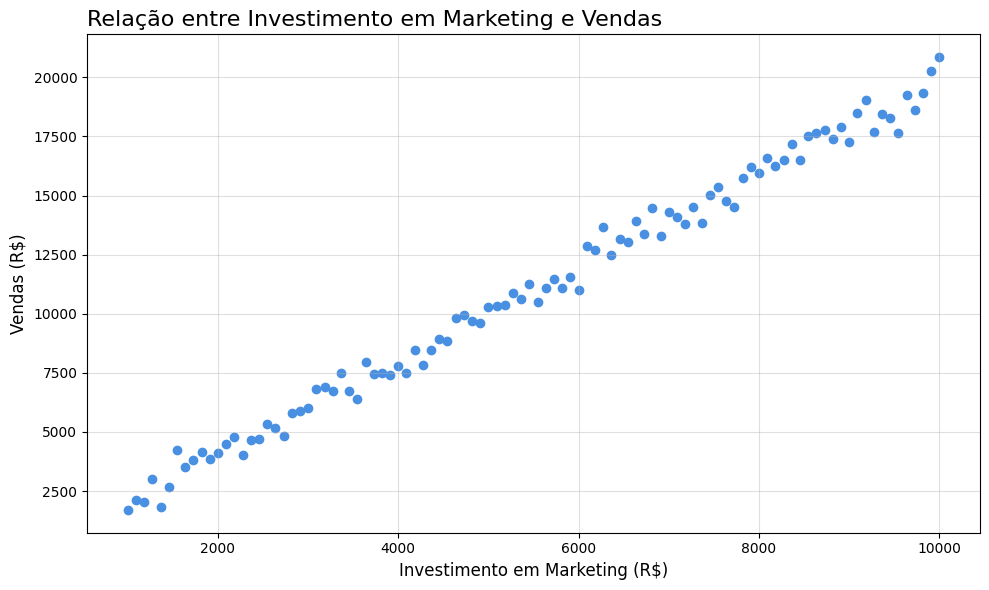

In [ ]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(investimento_marketing, vendas, color='#4a90e2')  # Cria os pontos de dispersão (azul)

# Personalizando o gráfico
plt.title('Relação entre Investimento em Marketing e Vendas', fontsize=16, loc='left')  # Adiciona o título
plt.xlabel('Investimento em Marketing (R$)', fontsize=12)  # Adiciona o rótulo do eixo X
plt.ylabel('Vendas (R$)', fontsize=12)  # Adiciona o rótulo do eixo Y
plt.grid(True, alpha=0.4)  # Adiciona uma grade leve no fundo

# Ajustando o layout e exibindo o gráfico
plt.tight_layout()  # Ajusta os elementos para evitar sobreposição
plt.show()

- [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

### Expandindo o material: Reta de tendência

Nesses exemplos, também é comum adicionar uma **reta de tendência** para destacar de forma mais clara o comportamento da relação entre as variáveis.

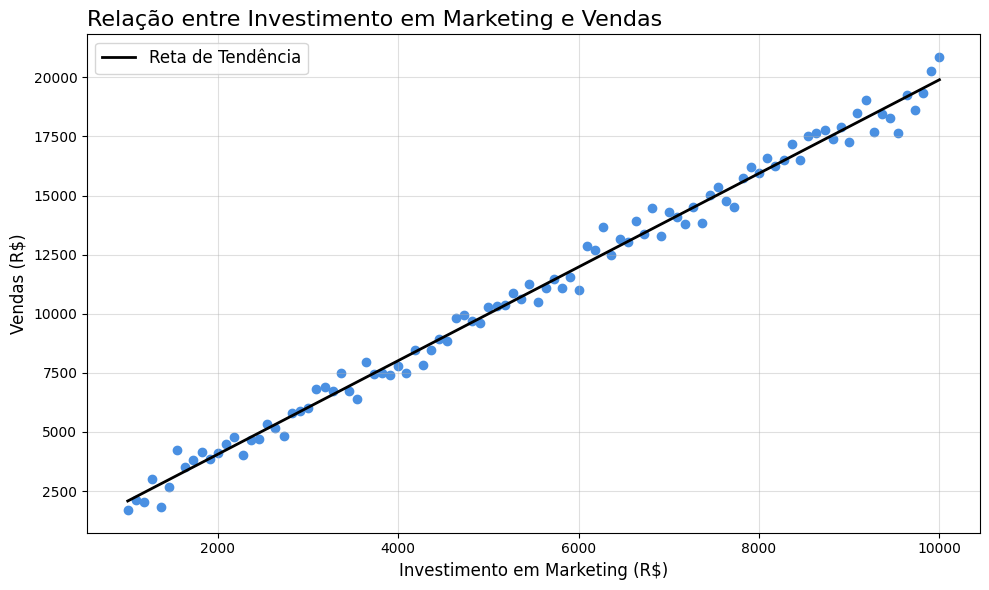

In [ ]:
# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.scatter(investimento_marketing, vendas, color='#4a90e2')  # Cria os pontos de dispersão (azul)

# Adicionando uma linha de tendência (reta)
coef = np.polyfit(investimento_marketing, vendas, 1)  # Calcula os coeficientes da reta de tendência
linha_tendencia = np.polyval(coef, investimento_marketing)  # Calcula os valores da reta
plt.plot(investimento_marketing, linha_tendencia, color='black', linewidth=2, label='Reta de Tendência')  # Adiciona a reta

# Personalizando o gráfico
plt.title('Relação entre Investimento em Marketing e Vendas', fontsize=16, loc='left')  # Adiciona o título
plt.xlabel('Investimento em Marketing (R$)', fontsize=12)  # Adiciona o rótulo do eixo X
plt.ylabel('Vendas (R$)', fontsize=12)  # Adiciona o rótulo do eixo Y
plt.grid(True, alpha=0.4)  # Adiciona uma grade leve no fundo
plt.legend(fontsize=12)  # Adiciona a legenda

# Ajustando o layout e exibindo o gráfico
plt.tight_layout()  # Ajusta os elementos para evitar sobreposição
plt.show()

- [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
- [`np.polyval`](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html)
- [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

### Expandindo o material: Matriz de correlação

Utilizamos o gráfico de matriz de correlação para entender, de forma visual, a relação entre variáveis em nosso conjunto de dados.

A matriz apresenta os **coeficientes de correlação** entre todas as combinações de variáveis, variando de **-1** a **1**:
- **-1**: Correlação negativa perfeita (as variáveis se movem em direções opostas).
- **1**: Correlação positiva perfeita (as variáveis se movem na mesma direção).
- **0**: Ausência de correlação (não há relação linear entre as variáveis).

Saiba mais sobre a matriz de correlação [neste artigo](https://www.alura.com.br/artigos/tipo-de-visualizacao-de-dados?srsltid=AfmBOop3lo0vltYH_Amjl7KKg3Xg_8OD46YKZmX8Y73EXEXqkj3YrucW#tipos-de-visualizacao-de-dados:~:text=de%20fazer%20conclus%C3%B5es.-,Matriz%20de%20correla%C3%A7%C3%A3o,-O%20nosso%20%C3%BAltimo)

In [ ]:
import pandas as pd
import seaborn as sns

# Dados
np.random.seed(40)  # Garante reprodutibilidade
X = np.random.rand(100)  # Variável X (aleatória entre 0 e 1)
Y = 2 * X + np.random.normal(0, 0.1, 100)  # Variável Y (linearmente relacionada a X)
Z = np.random.rand(100)  # Variável Z (independente de X e Y)

# Criando um DataFrame com as variáveis
dados = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})

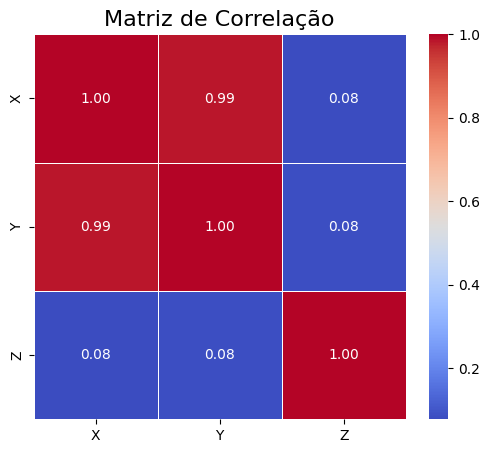

In [ ]:
# Calculando a matriz de correlação
correlacao = dados.corr()

# Exibindo a matriz de correlação
plt.figure(figsize=(6, 5))  # Define o tamanho do gráfico
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Cria o gráfico de calor
# annot=True: Adiciona os valores na matriz
# cmap='coolwarm': Define o gradiente de cores
# fmt='.2f': Formata os valores com 2 casas decimais
# linewidths=0.5: Define o espaçamento entre as células

plt.title('Matriz de Correlação', fontsize=16)  # Adiciona um título ao gráfico
plt.show()  # Exibe o gráfico

- [`sns.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Finalização

Com isso, você aprendeu como construir visualizações para gráficos de **composição** e **relacionamento** usando Python!

Agora é o momento ideal para praticar o conhecimento adquirido com os exercícios disponibilizados após este material. Fique à vontade para compartilhar o que você aprendeu e ajudar outras pessoas.

**Boas práticas e bons estudos!**